In [10]:
import pandas as pd

train = pd.read_csv("train_scaled.csv")
test = pd.read_csv("test_scaled.csv")

print(train.shape, test.shape)
print(train.columns)

(918, 39) (355, 39)
Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Drivers_gender',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Casualty_gender',
       'Age_band_of_casualty', 'Work_of_casuality', 'Fitness_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident', 'Weather_conditions_Normal',
       'Weather_conditions_Other', 'Weather_conditions_Raining',
       'Weather_conditions_Raining and Windy', 'Weather_conditions_Snow',
       'Weather_conditions_Unknown', 'Weather_conditions_Windy',
       'Light_conditions_Darkness - lights unlit',
       'Light_conditions_Da

In [11]:
# Keep only numeric columns for correlation
numeric_train = train.select_dtypes(include=['int64', 'float64'])


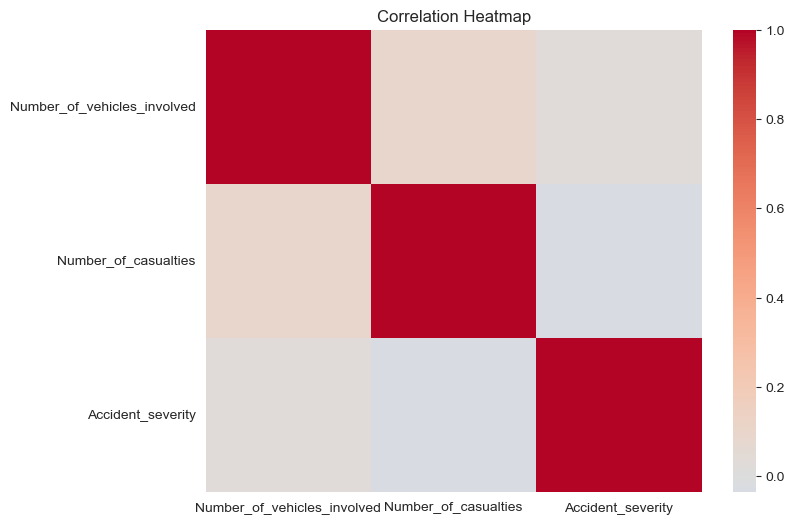

Accident_severity              1.000000
Number_of_vehicles_involved    0.026494
Number_of_casualties          -0.035391
Name: Accident_severity, dtype: float64


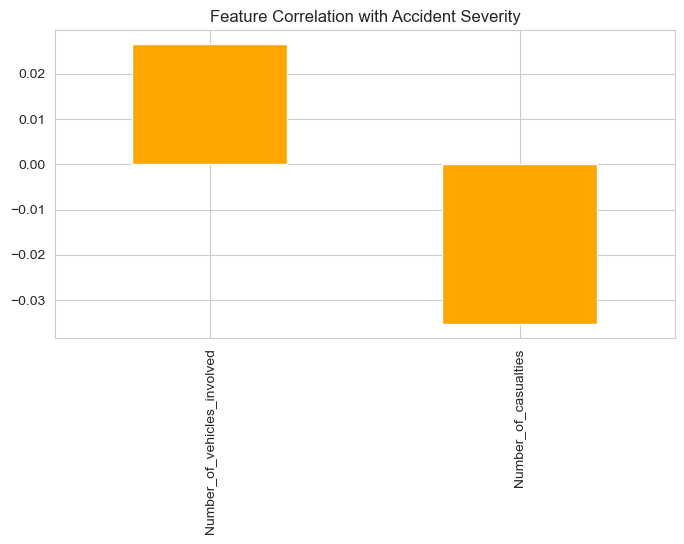

In [12]:
# Correlation with target (Accident_severity)
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
corr_matrix = numeric_train.corr()

# heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# correlation with target
correlation = corr_matrix["Accident_severity"].sort_values(ascending=False)
print(correlation)

# bar plot
correlation.drop("Accident_severity").plot(kind="bar", color="orange", figsize=(8,4))
plt.title("Feature Correlation with Accident Severity")
plt.show()


In [13]:
# Drop low-correlation features
low_corr = correlation[abs(correlation) < 0.05].index
train_corr_selected = train.drop(columns=low_corr, errors="ignore")
test_corr_selected = test.drop(columns=low_corr, errors="ignore")

print("After correlation filter:", train_corr_selected.shape)


After correlation filter: (918, 37)


In [18]:
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt

# Keep only numeric columns (except target)
X = train_corr_selected.drop("Accident_severity", axis=1, errors="ignore")
X_numeric = X.select_dtypes(include=["int64", "float64"])

if X_numeric.shape[1] == 0:
    print("⚠️ No numeric columns available for variance selection.")
else:
    print(f"Using {X_numeric.shape[1]} numeric features for variance selection.")

    # variance before
    variances = X_numeric.var()
    variances.plot(kind="bar", figsize=(8,4), color="teal")
    plt.title("Variance Before Selection")
    plt.show()

    # apply variance threshold
    selector = VarianceThreshold(threshold=0.01)
    X_selected = selector.fit_transform(X_numeric)

    selected_features = X_numeric.columns[selector.get_support()]
    print("Selected features:", list(selected_features))

    # variance after
    variances_after = variances[selected_features]
    variances_after.plot(kind="bar", figsize=(8,4), color="green")
    plt.title("Variance After Selection")
    plt.show()


⚠️ No numeric columns available for variance selection.


In [20]:
# If variance threshold worked, we should have X_selected and selected_features
try:
    train_selected = pd.concat(
        [y.reset_index(drop=True),
         pd.DataFrame(X_selected, columns=selected_features)],
        axis=1
    )
    test_selected = test_corr_selected[selected_features]

    print("Final shapes:", train_selected.shape, test_selected.shape)

    train_selected.to_csv("train_feature_selected.csv", index=False)
    test_selected.to_csv("test_feature_selected.csv", index=False)
    print("✅ Feature-selected datasets saved!")

except NameError:
    print("⚠️ Variance threshold step did not produce X_selected/selected_features.")
    print("Keeping correlation-selected features instead.")

    train_selected = train_corr_selected.copy()
    test_selected = test_corr_selected.copy()

    print("Final shapes:", train_selected.shape, test_selected.shape)

    train_selected.to_csv("train_feature_selected.csv", index=False)
    test_selected.to_csv("test_feature_selected.csv", index=False)
    print("✅ Correlation-selected datasets saved!")


⚠️ Variance threshold step did not produce X_selected/selected_features.
Keeping correlation-selected features instead.
Final shapes: (918, 37) (355, 37)
✅ Correlation-selected datasets saved!
